In [1]:
pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from worst_case_bond_price_data import *

We solve for $V^{nom}$

In [4]:
delta = cp.Variable(T)

In [5]:
p = [cp.exp(-t[i] * (y_nom[i]+delta[i])) for i in range(T)]

In [6]:
objective = cp.Minimize(c.T @ p)

constraints = [
    delta[0] == 0,
    np.ones(T).T @ delta == 0,
    cp.sum_squares(cp.diff(delta)) <= cp.power(rho,2),
    -kappa <= delta,
    delta <= kappa
]

problem = cp.Problem(objective, constraints)
result = problem.solve(solver='SCS')

In [7]:
print("V^{nom} is",result)

V^{nom} is 11.017072996239953


We can also solve for $V^{\mathrm{wc}}=\min \left\{c^{T} p \mid y \in \mathcal{Y}\right\}$

In [8]:
y = cp.Variable(T)

In [9]:
p2 = [cp.exp(-t[i] * y[i]) for i in range(T)]

In [10]:
objective2 = cp.Minimize(c.T @ p2)

problem2 = cp.Problem(objective2)
result2 = problem2.solve()

In [11]:
print("V^{wc} is", result2)

V^{wc} is 2.6017830306212037e-09


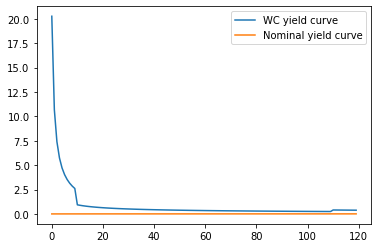

In [12]:
plt.plot(y.value, label="WC yield curve")
plt.plot(y_nom, label="Nominal yield curve")
plt.legend()
plt.show()

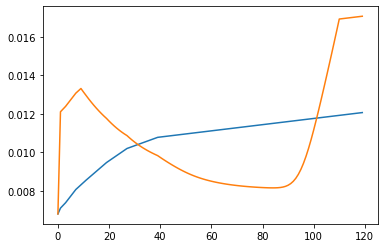

In [13]:
plt.plot(y_nom)
plt.plot(y_nom + delta.value)
plt.show()